In [1]:
import numpy as np
import matplotlib.pyplot as plt

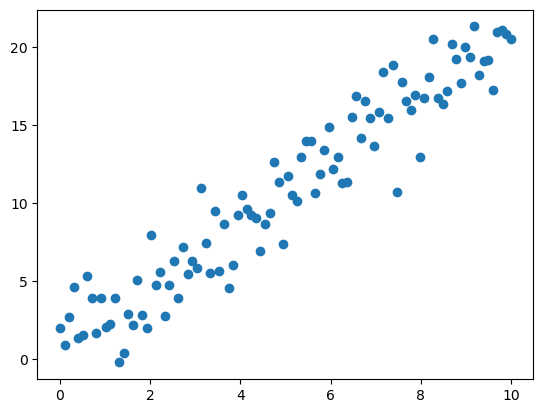

In [2]:
np.random.seed(42)  # For reproducibility
# Generate synthetic dataset
n = 100
x = np.linspace(0, 10, n)
x
epsilon = np.random.normal(0, 2, n)
epsilon
y = 2 * x + 1 + epsilon # (-1 => 3)
plt.scatter(x,y)

In [3]:
trainExample = list(zip(x, y))
trainExample

[(0.0, 1.9934283060224653),
 (0.10101010101010101, 0.9254915996778327),
 (0.20202020202020202, 2.699417480241789),
 (0.30303030303030304, 4.652120318876657),
 (0.40404040404040403, 1.339774058634136),
 (0.5050505050505051, 1.5418270962026492),
 (0.6060606060606061, 5.370546843135995),
 (0.7070707070707071, 3.949010872447232),
 (0.8080808080808081, 1.6772128442917116),
 (0.9090909090909091, 3.9033019053537474),
 (1.0101010101010102, 2.093366634577096),
 (1.1111111111111112, 2.2907627150817085),
 (1.2121212121212122, 3.9081669673744925),
 (1.3131313131313131, -0.20029786305296948),
 (1.4141414141414141, 0.37844716325676275),
 (1.5151515151515151, 2.9057279718210847),
 (1.6161616161616161, 2.2066609916543842),
 (1.7171717171717171, 5.062838099533982),
 (1.8181818181818181, 2.820315485321215),
 (1.9191919191919191, 2.0137764357132553),
 (2.0202020202020203, 7.971701578247149),
 (2.121212121212121, 4.7908716414511705),
 (2.2222222222222223, 5.579500853820292),
 (2.323232323232323, 2.7969682

In [4]:
# Define phi x,
def phi(x):
    return np.array([x, 1])

def L(trainExample, W):
    total_loss = 0.0

    for x, y in trainExample: # Unpacked - List (tuple)
        loss_per_data_points = (y - W.T @ phi(x))**2
        total_loss += loss_per_data_points

    return total_loss/len(trainExample)

def gradient_loss(trainExample, W):
    total_gra_loss = 0.0

    for x, y in trainExample: # Unpacked - List (tuple)
        loss_per_data_points = - 2 * (y - W.T @ phi(x))* phi(x) # partial derivative for W[0] = W_1
        total_gra_loss += loss_per_data_points

    return total_gra_loss/len(trainExample)


W = np.array([0, 0]) #define parameter
lr = 0.0001
for i in range(10000):
    old_W = W
    loss = L(trainExample, W) # Loss
    gra_loss = gradient_loss(trainExample, W) # gradient
    W = W - lr * gra_loss # Gradient Descent
    if i % 200 == 0:
        print("="*30)
        print(f"Old W: {old_W} - Gra_loss: {gra_loss} - Old Loss: {loss} - New W: {W}")
        print("="*30)

Old W: [0 0] - Gra_loss: [-142.39886763  -21.58461393] - Old Loss: 154.68484036367178 - New W: [0.01423989 0.00215846]
Old W: [1.55274454 0.23692375] - Gra_loss: [-35.99051754  -5.58332098] - Old Loss: 12.96990352015654 - New W: [1.5563436  0.23748209]
Old W: [1.94502283 0.29932548] - Gra_loss: [-9.08253421 -1.53573465] - Old Loss: 3.907193063905836 - New W: [1.94593109 0.29947905]
Old W: [2.04385019 0.3175701 ] - Gra_loss: [-2.27832203 -0.5109718 ] - Old Loss: 3.327140650373555 - New W: [2.04407803 0.31762119]
Old W: [2.06847438 0.32462407] - Gra_loss: [-0.55787894 -0.25062199] - Old Loss: 3.289534949393683 - New W: [2.06853017 0.32464913]
Old W: [2.07433795 0.32882408] - Gra_loss: [-0.12299969 -0.18358624] - Old Loss: 3.2866269182431482 - New W: [2.07435025 0.32884244]
Old W: [2.075461   0.33227853] - Gra_loss: [-0.01320752 -0.16544691] - Old Loss: 3.2859475768753565 - New W: [2.07546232 0.33229508]
Old W: [2.07538883 0.3355208 ] - Gra_loss: [ 0.01437954 -0.15968407] - Old Loss: 3.28

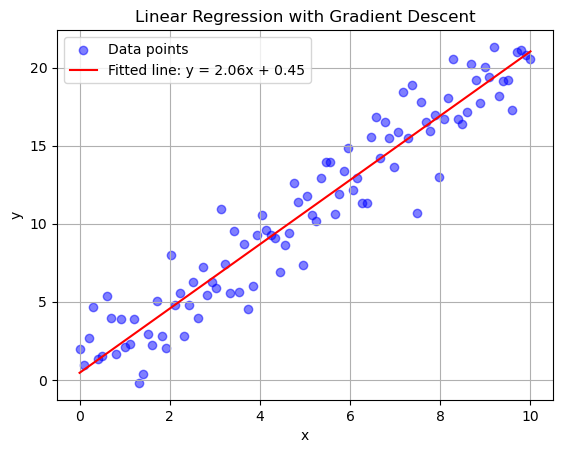

In [5]:
# Plot data and fitted line
plt.scatter(x, y, color='blue', label='Data points', alpha=0.5)
y_plot = W[0] * x + W[1]
plt.plot(x, y_plot, color='red', label=f'Fitted line: y = {W[0]:.2f}x + {W[1]:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()